<a href="https://colab.research.google.com/github/selcukkanun/DSA210-F1-LOGISTICS/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis (EDA)**

**1. Basics: Data collecting, merging libraries used etc.**

In this project I will be using some of the most important statistical python libraries to analyze, merge, search and apply statistical testings on the data. These are panda, matplotlib, seaborn and numpy.

I did some filtering along the way the first one was I only considered races from 1985. It is because F1 is constantly changing and we need to consider the much more modern eras. In the older dates the format was varying much in early years there was no teammates and very few wet races this is why I picked these dates. Also applied limitations of 5 races because it would create much noise for drivers who races for 1 race would meant 100% or 0%.

I collected the number of championships data from wikipedia and cross checked the weather data from the kaggle with simply going over each races that has precipitaion. I checked whether it has affected the particular race or not and then used LLM to cross check it from discussions on Reddit.

Then I merged all the results from results.csv and used the wet race divtionary to tag them as wet races.
Then I got "statusId", "status" from status.csv";
got "raceId", "year", "name", "is_true_wet" from results.csv;
got "constructorId","name" and merged them all.

In [3]:
true_wet_races = {
    1985: ["Portuguese Grand Prix", "Belgian Grand Prix"],
    1986: [],
    1987: [],
    1988: ["British Grand Prix", "German Grand Prix", "Japanese Grand Prix"],
    1989: ["Canadian Grand Prix", "Belgian Grand Prix", "Australian Grand Prix"],
    1990: ["Canadian Grand Prix"],
    1991: ["Brazilian Grand Prix", "San Marino Grand Prix", "Spanish Grand Prix", "Australian Grand Prix"],
    1992: ["Spanish Grand Prix", "French Grand Prix", "Belgian Grand Prix"],
    1993: ["Brazilian Grand Prix", "European Grand Prix", "San Marino Grand Prix", "Japanese Grand Prix"],
    1994: ["Japanese Grand Prix"],
    1995: ["Argentine Grand Prix", "San Marino Grand Prix", "Belgian Grand Prix", "European Grand Prix", "Japanese Grand Prix"],
    1996: ["Brazilian Grand Prix", "Monaco Grand Prix", "Spanish Grand Prix"],
    1997: ["Monaco Grand Prix", "French Grand Prix", "Belgian Grand Prix"],
    1998: ["Argentine Grand Prix", "British Grand Prix", "Belgian Grand Prix"],
    1999: ["French Grand Prix", "European Grand Prix"],
    2000: ["European Grand Prix", "Canadian Grand Prix", "German Grand Prix", "Belgian Grand Prix",
           "United States Grand Prix", "Japanese Grand Prix"],
    2001: ["Malaysian Grand Prix", "Brazilian Grand Prix"],
    2002: ["British Grand Prix"],
    2003: ["Brazilian Grand Prix", "United States Grand Prix"],
    2004: ["Malaysian Grand Prix", "Italian Grand Prix", "Brazilian Grand Prix"],
    2005: ["Belgian Grand Prix"],
    2006: ["Hungarian Grand Prix", "Chinese Grand Prix"],
    2007: ["European Grand Prix", "Japanese Grand Prix", "Chinese Grand Prix"],
    2008: ["Monaco Grand Prix", "British Grand Prix", "Belgian Grand Prix", "Italian Grand Prix", "Brazilian Grand Prix"],
    2009: ["Malaysian Grand Prix", "Chinese Grand Prix"],
    2010: ["Australian Grand Prix", "Chinese Grand Prix", "Belgian Grand Prix", "Korean Grand Prix"],
    2011: ["Canadian Grand Prix", "British Grand Prix", "Hungarian Grand Prix"],
    2012: ["Malaysian Grand Prix", "Brazilian Grand Prix"],
    2013: ["European Grand Prix"],
    2014: ["Hungarian Grand Prix", "Japanese Grand Prix"],
    2015: ["British Grand Prix", "United States Grand Prix"],
    2016: ["Monaco Grand Prix", "British Grand Prix", "Brazilian Grand Prix"],
    2017: ["Chinese Grand Prix", "Singapore Grand Prix"],
    2018: ["German Grand Prix"],
    2019: ["German Grand Prix"],
    2020: ["Turkish Grand Prix"],
    2021: ["Emilia Romagna Grand Prix", "Russian Grand Prix", "Turkish Grand Prix"],
    2022: ["Emilia Romagna Grand Prix", "Monaco Grand Prix", "Singapore Grand Prix", "Japanese Grand Prix"],
    2023: ["Monaco Grand Prix", "Dutch Grand Prix"],
    2024: ["Canadian Grand Prix", "British Grand Prix", "Brazilian Grand Prix"]
}

In [4]:

world_champions_1985_2024 = {
    "Alain Prost": 3,
    "Ayrton Senna": 4,
    "Nigel Mansell": 1,
    "Michael Schumacher": 7,
    "Mika Hakkinen": 2,
    "Damon Hill": 1,
    "Jacques Villeneuve": 1,
    "Fernando Alonso": 2,
    "Kimi Raikkonen": 1,
    "Jenson Button": 1,
    "Sebastian Vettel": 4,
    "Lewis Hamilton": 7,
    "Nico Rosberg": 1,
    "Max Verstappen": 4
}

In [5]:

import pandas as pd

races = pd.read_csv("races.csv")

races = races[(races["year"] >= 1985) & (races["year"] <= 2024)]

# Add wet indicator
def is_true_wet(row):
    return row["name"] in true_wet_races.get(row["year"], [])

races["is_true_wet"] = races.apply(is_true_wet, axis=1)

# Save
races_with_wettag = "races_with_wettag.csv"
races.to_csv(races_with_wettag, index=False)

In [6]:
import pandas as pd
races = pd.read_csv("races_with_wettag.csv")
results = pd.read_csv("results.csv")
drivers = pd.read_csv("drivers.csv")
constructors = pd.read_csv("constructors.csv")
status = pd.read_csv("status.csv")

results = results.merge(
    status[["statusId", "status"]],
    on="statusId",
    how="left"
)
merged = results.merge(
    races[["raceId", "year", "name", "is_true_wet"]],
    on="raceId",
    how="inner"
)
merged = merged.merge(
    drivers[["driverId","forename","surname"]],
    on="driverId",
    how="left"
)
merged = merged.merge(
    constructors[["constructorId","name"]].rename(columns={"name":"constructorName"}),
    on="constructorId",
    how="left"
)
merged = merged[[
    "raceId", "year", "name",
    "driverId", "forename", "surname",
    "constructorId", "constructorName",
    "positionText", "status",
    "is_true_wet"
]]
driver_finishin_position = "driver_finishing_positions.csv"
merged.to_csv(driver_finishin_position, index=False)

In [12]:
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-v0_8")

df = pd.read_csv("driver_finishing_positions.csv")

print(df.shape)
df.head(10)


(16681, 11)


,raceId,year,name,driverId,forename,surname,constructorId,constructorName,positionText,status,is_true_wet
0,18,2008,Australian Grand Prix,1,Lewis,Hamilton,1,McLaren,1,Finished,False
1,18,2008,Australian Grand Prix,2,Nick,Heidfeld,2,BMW Sauber,2,Finished,False
2,18,2008,Australian Grand Prix,3,Nico,Rosberg,3,Williams,3,Finished,False
3,18,2008,Australian Grand Prix,4,Fernando,Alonso,4,Renault,4,Finished,False
4,18,2008,Australian Grand Prix,5,Heikki,Kovalainen,1,McLaren,5,Finished,False
5,18,2008,Australian Grand Prix,6,Kazuki,Nakajima,3,Williams,6,+1 Lap,False
6,18,2008,Australian Grand Prix,7,Sébastien,Bourdais,5,Toro Rosso,7,Engine,False
7,18,2008,Australian Grand Prix,8,Kimi,Räikkönen,6,Ferrari,8,Engine,False
8,18,2008,Australian Grand Prix,9,Robert,Kubica,2,BMW Sauber,R,Collision,False
9,18,2008,Australian Grand Prix,10,Timo,Glock,7,Toyota,R,Accident,False


In the end this is what we acquire.

We will use already acquired data set in the testing of Hypothesis 2. So No need for merging any data just utilizing the rain data in the second part.

**2. How I test the Hypothesis and data overview and data explanation**

I will be testing Hypothesis 1 simply by calculating each drivers win rate agains their teammate. It is simple because In the upper data we have status and position information. We will simply check, in the same race, whether who got a better position in same team. Basically checking constructorName for each driver, team size is 2 by default, and compare it with the other driver who share the same constructor name in the same race. Then calculate beat_teammate/total_races this will simply give me how many times they outperformed their teammates divided by their total number of races.

A closer look at the date would be like:

In [15]:
import pandas as pd
import seaborn as sns
plt.style.use("seaborn-v0_8")

fileName=pd.read_csv("clean_teammate_beating_rate.csv")
print(fileName.shape)

fileName.head(10)

(157, 6)


,driverId,forename,surname,total_races,beat_count,beating_rate
0,1,Lewis,Hamilton,292,180,0.616438
1,2,Nick,Heidfeld,64,32,0.500000
2,3,Nico,Rosberg,130,69,0.530769
3,4,Fernando,Alonso,230,182,0.791304
4,5,Heikki,Kovalainen,40,18,0.450000
5,6,Kazuki,Nakajima,22,4,0.181818
6,7,Sébastien,Bourdais,14,2,0.142857
7,8,Kimi,Räikkönen,193,95,0.492228
8,9,Robert,Kubica,53,31,0.584906
9,10,Timo,Glock,21,11,0.523810


**Second Hypothesis:**
For the second Hypothesis I will simply utilize driver_finishin_position.csv since I already merged rain dictionary in the first part. I would simply check finishing position of the driver(positionText) and check whether there was rain or not. Then simply check positionText if it is 1 then the driver won the race and if it is not they didn't win it. Simply calculate number of wins in the rain and divided it by total number of races in the rain so i could get win rate in the rain races.

**3. Visualizing The Results and Correlation Analysis:**

In the end basically I tried to visualize what I got by labeling and giving red color to champions and gray color to non-champions. It is because there are way too many Non-champion drivers compared to champions one's.

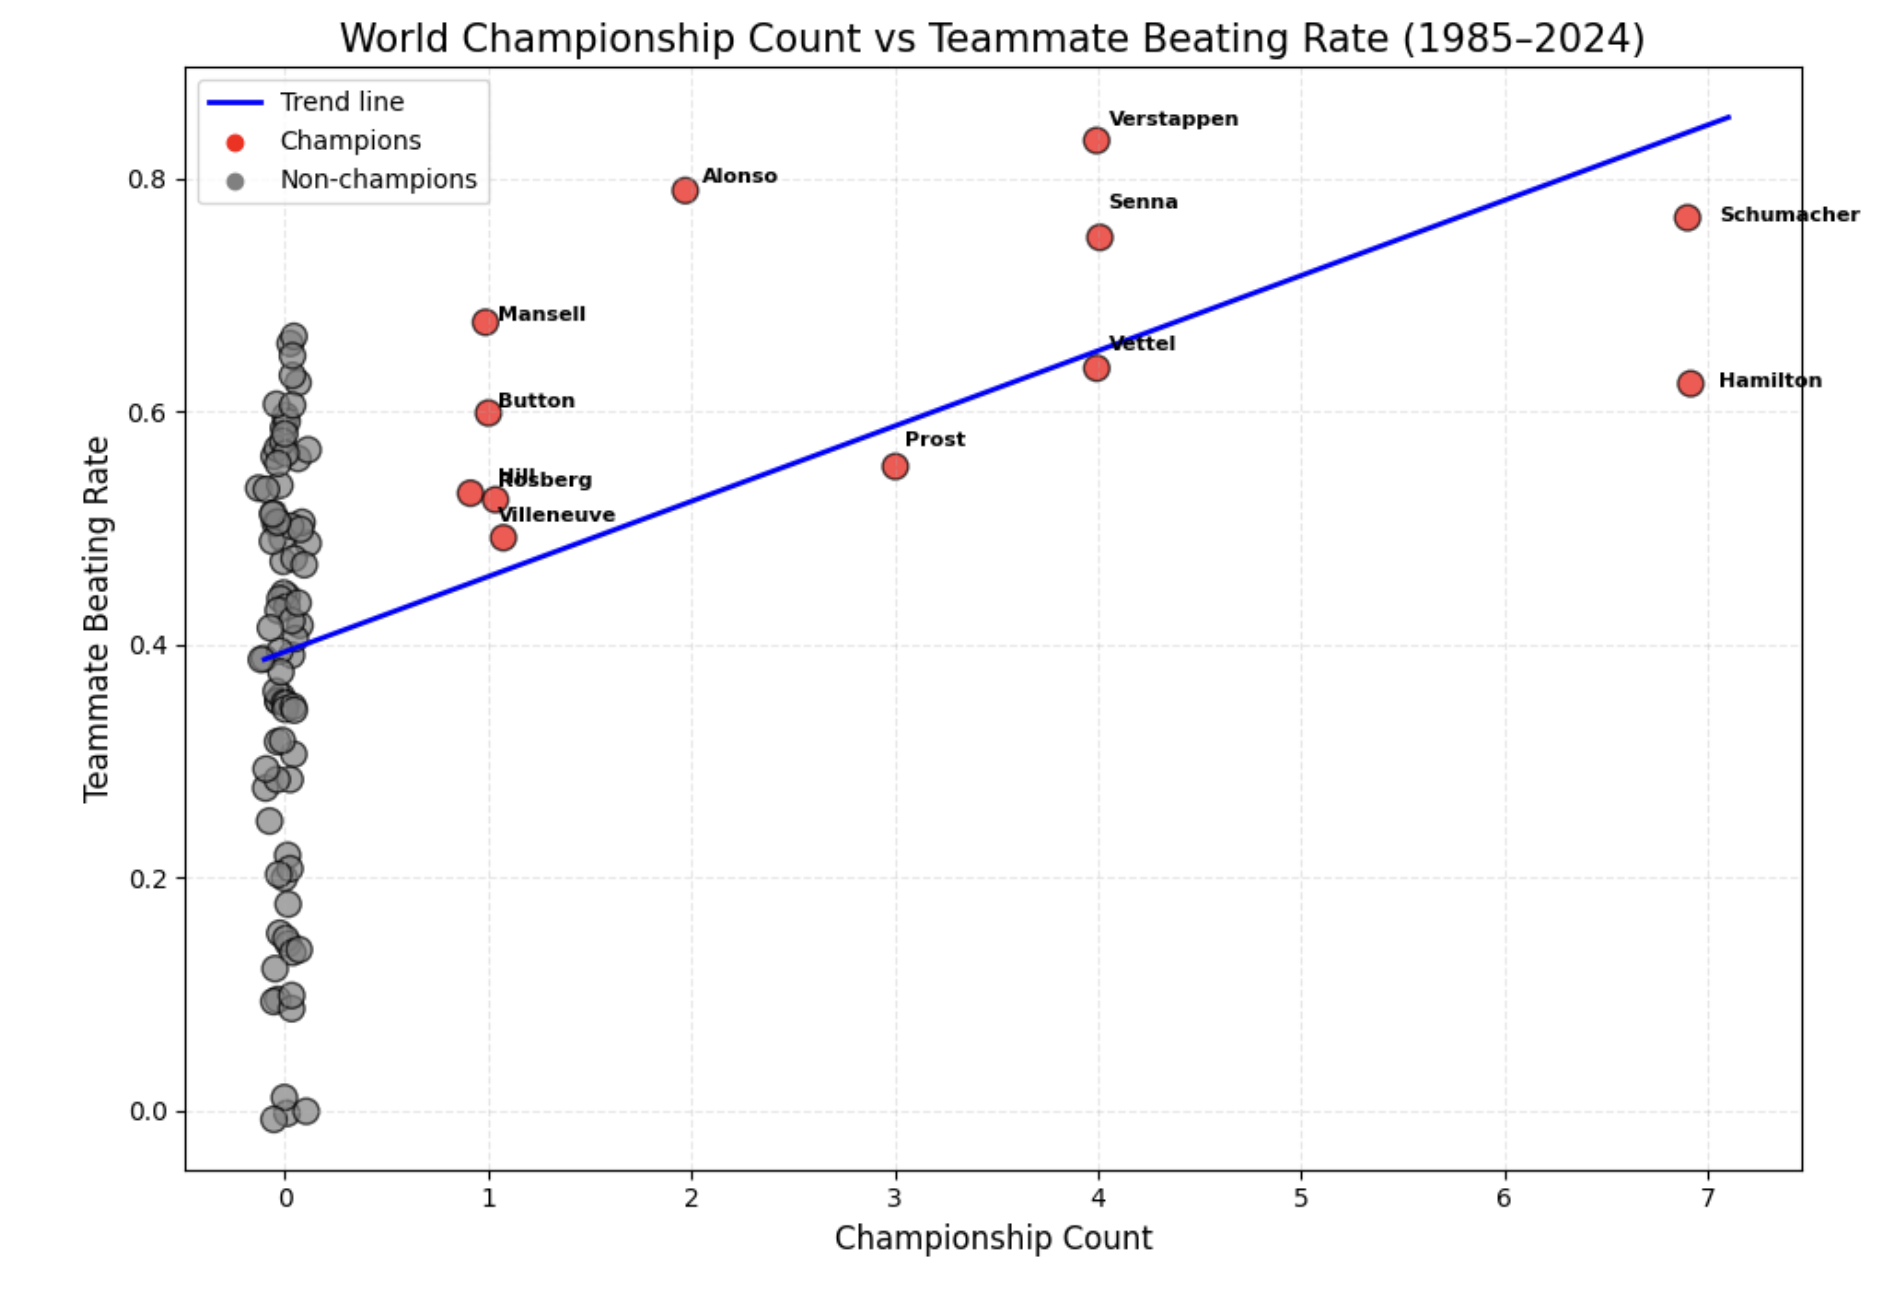

In here I will try to get correlation between championship count and teammate beating rate. Even though there is much more driver in the 0 championship still there is a strong trend curve as can be read from graphs. I will apply tests and check p_values in the Hypothesis Testing section.

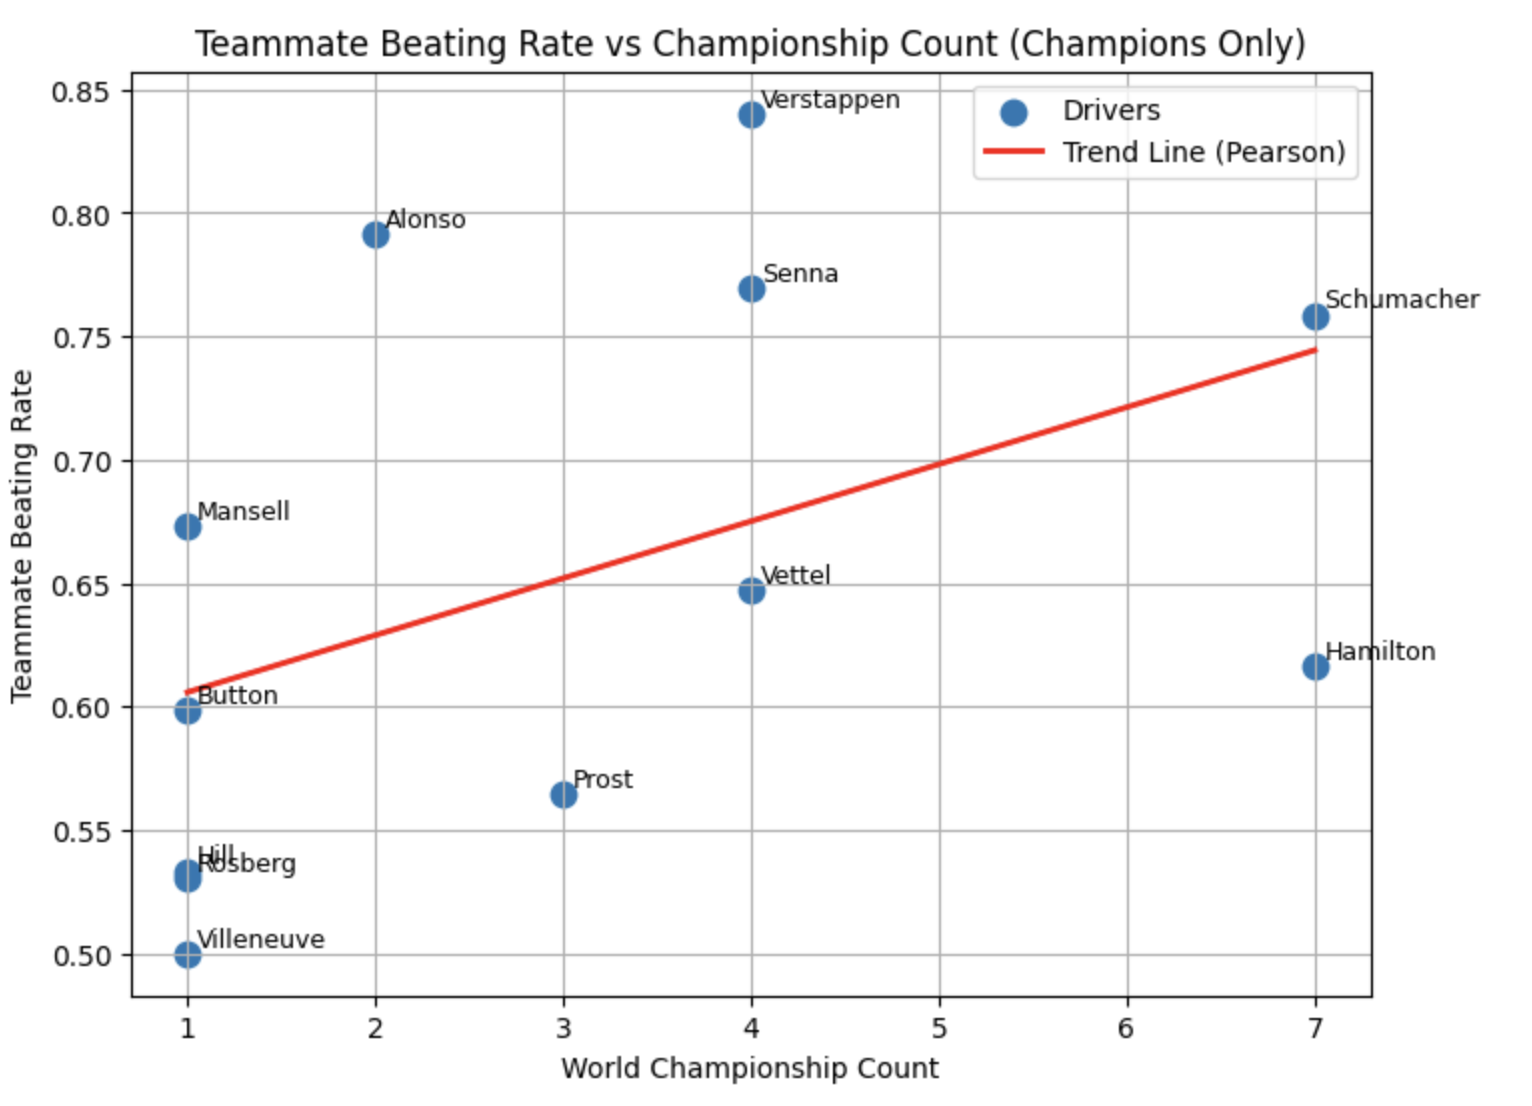

Again here I do the same comparision but only within champion drivers.

**Testing the second hypothesis:**


Again in similar fashion to the first one i will simply calculate and compare win rate in the wet races and number of championships and search for a correlation there. Afterwards apply tests for hypothesis testing here are how visualized versions looked like:

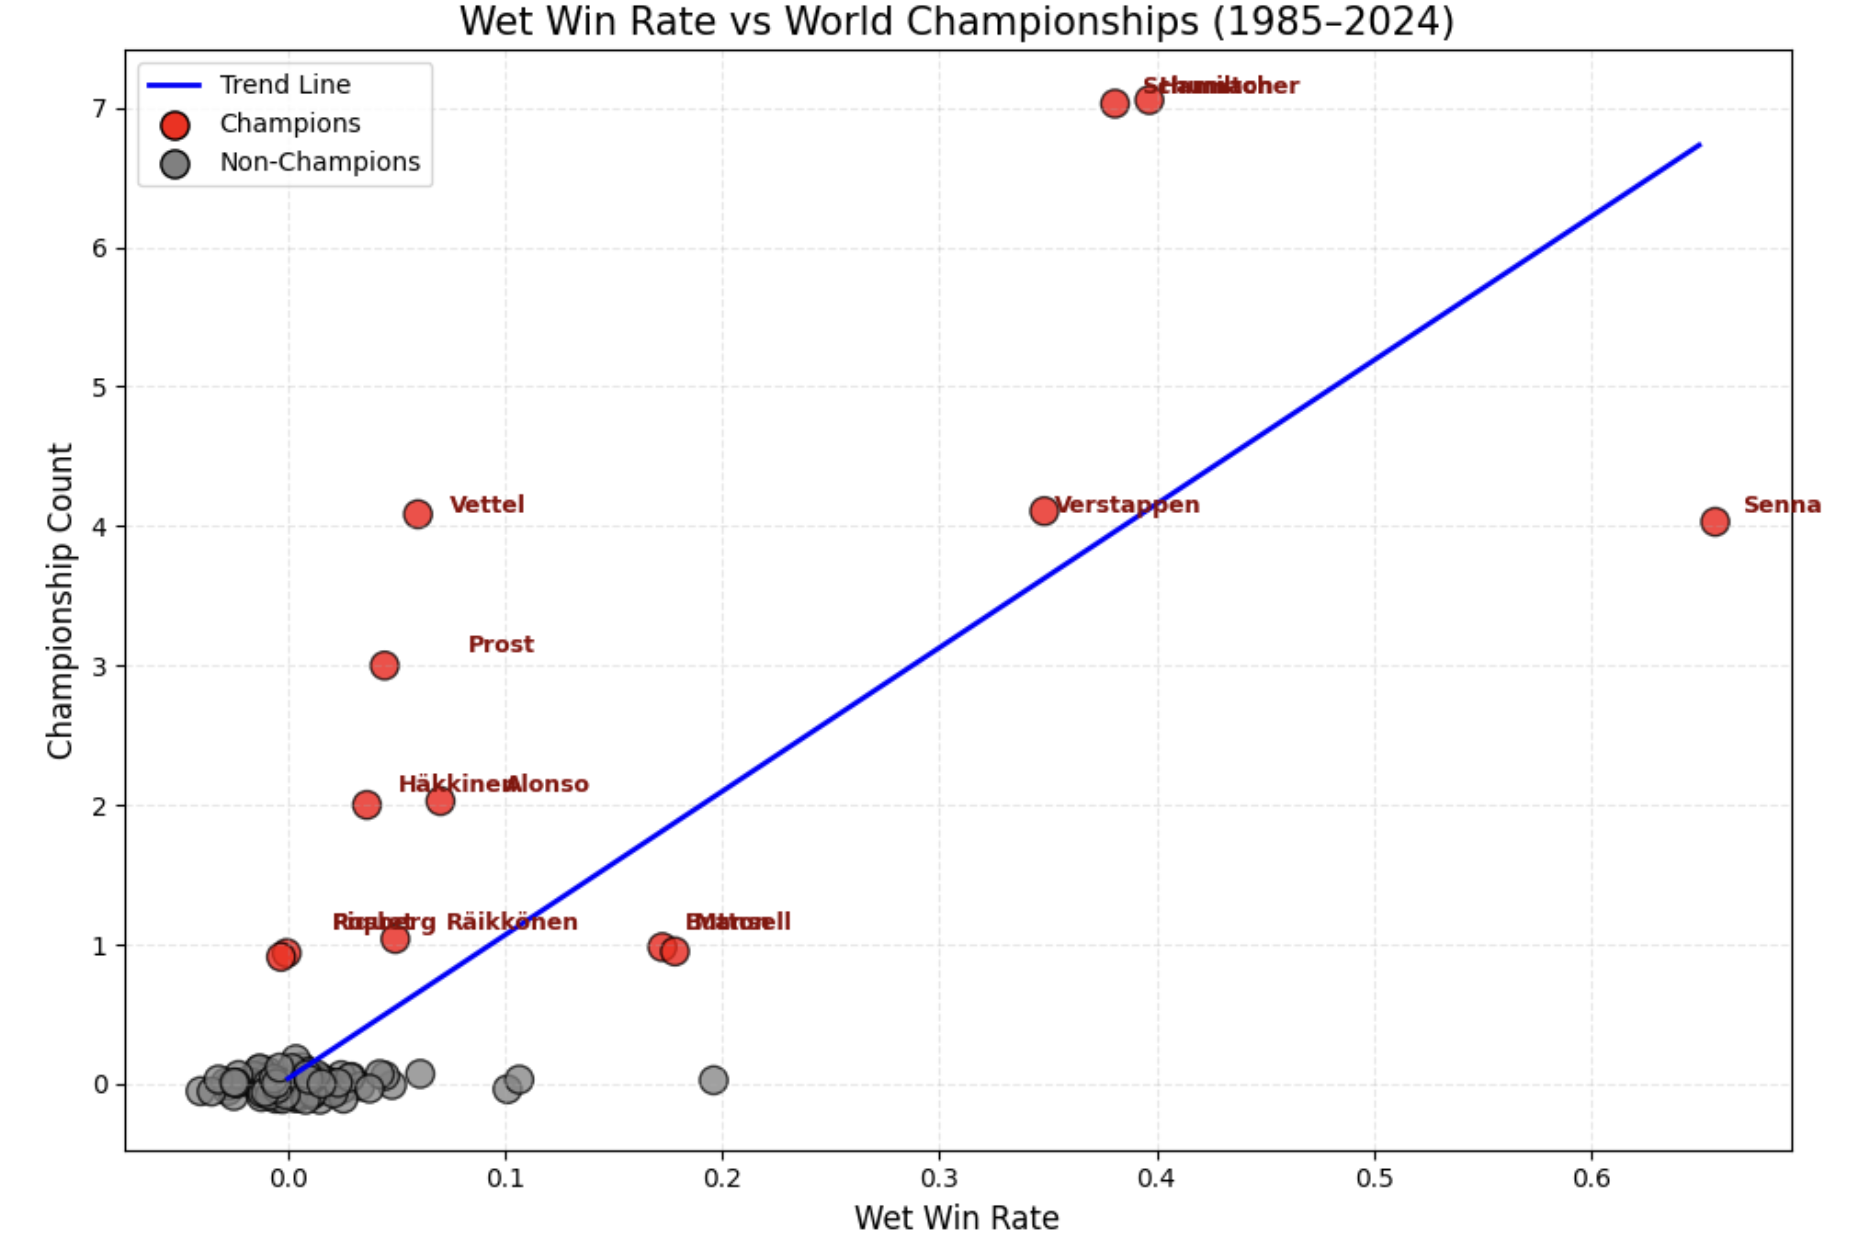

It is jittered that's why we have negative win rate here

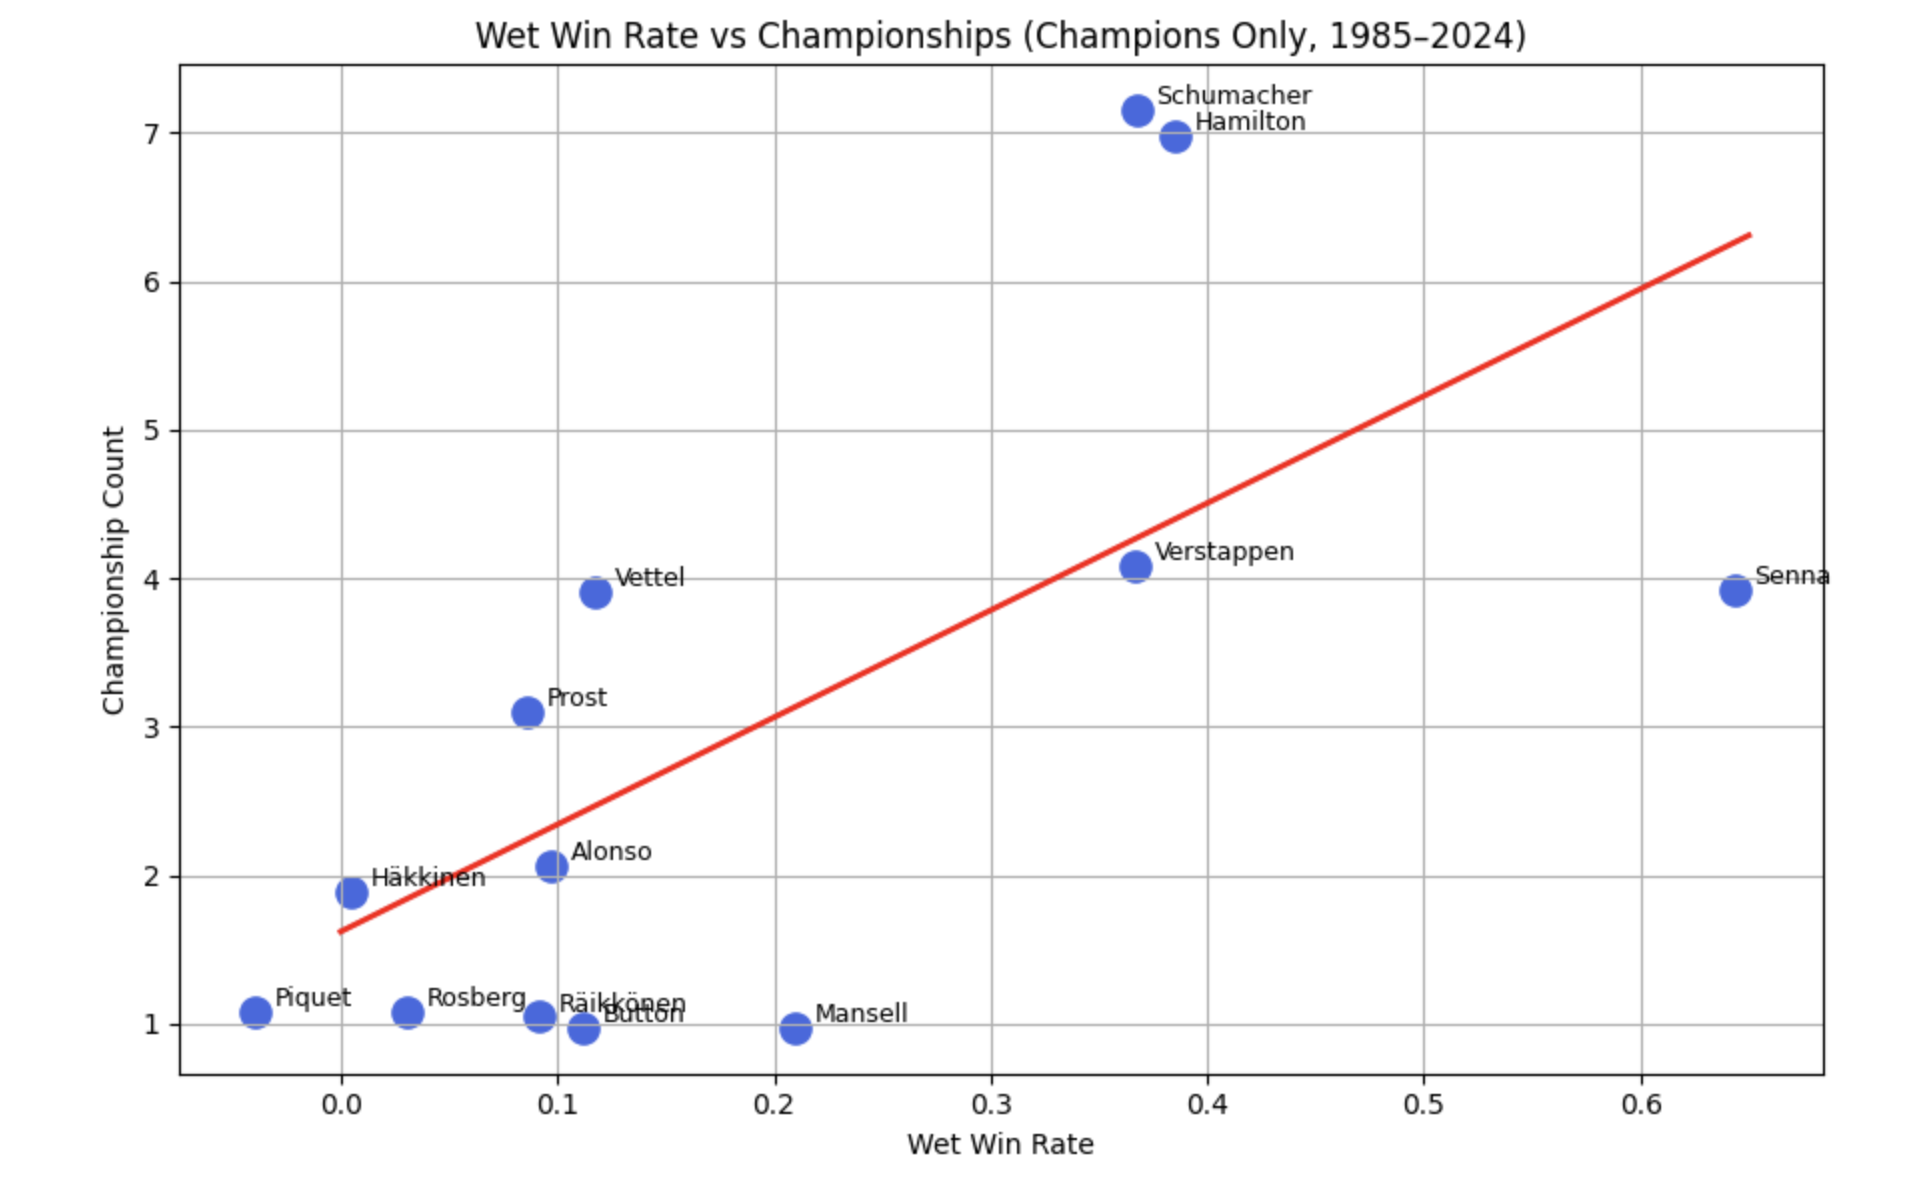

I used scatter plots for all these data sets since all the drivers are individual even we try to group them as champion and non-champion one's. I concluded that it would be pointless to use bar plots or other kind of techniques since there is huge difference between number of champions and non-champions.

**4. Comments and readings on the visuals, data sets and what do I expect to get in Hypothesis testing part:**

Exploratory data isualization demonstrates more our champions outperformed their teammates in equal cars. It shows that our champions are really talented compared to their teammate.

As can be seen from the exploratory visualization while number of many drivers done poorly on their wet races the champions showed very quality and it is clear that there is a strong relationship. However in here as I have stated before it is believed that wet races shows driving ability so I am much more interested in who are the outliers with 0 championships it could be very helpful for me the analyze them in further studies.

In further studies I am planning the go deeper who are these outliers and if They are still active drivers I will try to predict how likely it is to expect a championship from them in their career.

